In [34]:
# Ridge Regression Model
# House Prices - Advanced Regression Techniques
# Capstone Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print("="*80)

Libraries imported successfully!


In [35]:
# ============================================================================
# 1. LOAD PREPROCESSED DATA
# ============================================================================

print("\n1. LOADING PREPROCESSED DATA")
print("-" * 80)

# Load the preprocessed data
train_data = pd.read_csv('../data/train_processed.csv')
test_data = pd.read_csv('../data/test_processed.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Separate features and target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")


1. LOADING PREPROCESSED DATA
--------------------------------------------------------------------------------
Training data shape: (1460, 265)
Test data shape: (1459, 264)

Features shape: (1460, 264)
Target shape: (1460,)
Number of features: 264


In [36]:
# ============================================================================
# 2. TRAIN-TEST SPLIT
# ============================================================================

print("\n2. CREATING TRAIN-VALIDATION SPLIT")
print("-" * 80)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Split ratio: 80-20")


2. CREATING TRAIN-VALIDATION SPLIT
--------------------------------------------------------------------------------
Training set size: 1168 samples
Validation set size: 292 samples
Split ratio: 80-20


In [37]:
# ============================================================================
# 3. FEATURE SCALING
# ============================================================================

print("\n3. FEATURE SCALING")
print("-" * 80)

# Ridge regression benefits from feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data)

print("StandardScaler applied to all features")
print(f"Mean of scaled training features: {X_train_scaled.mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std():.6f}")


3. FEATURE SCALING
--------------------------------------------------------------------------------
StandardScaler applied to all features
Mean of scaled training features: 0.000000
Std of scaled training features: 0.996205



4. HYPERPARAMETER TUNING (ALPHA SELECTION)
--------------------------------------------------------------------------------

Method 1: Using RidgeCV for automatic alpha selection
Best alpha found: 500.0


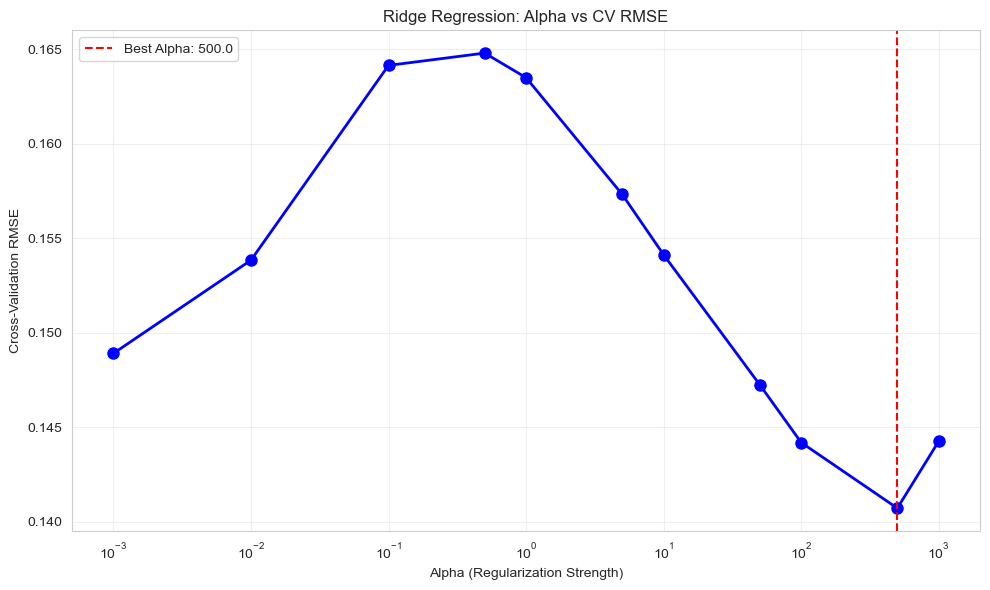

✓ Alpha selection plot saved

Method 2: Using GridSearchCV for detailed search
Best alpha from GridSearch: 100.0
Best CV RMSE: 0.144187


In [38]:
# ============================================================================
# 4. HYPERPARAMETER TUNING
# ============================================================================

print("\n4. HYPERPARAMETER TUNING (ALPHA SELECTION)")
print("-" * 80)

# Method 1: RidgeCV for efficient cross-validation
print("\nMethod 1: Using RidgeCV for automatic alpha selection")
alphas = [0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train_scaled, y_train)

print(f"Best alpha found: {ridge_cv.alpha_}")

# Visualize alpha selection
cv_scores = []
for alpha in alphas:
    ridge_temp = Ridge(alpha=alpha)
    scores = cross_val_score(ridge_temp, X_train_scaled, y_train, 
                            cv=5, scoring='neg_mean_squared_error')
    cv_scores.append(np.sqrt(-scores.mean()))

plt.figure(figsize=(10, 6))
plt.plot(alphas, cv_scores, 'bo-', linewidth=2, markersize=8)
plt.axvline(x=ridge_cv.alpha_, color='r', linestyle='--', 
            label=f'Best Alpha: {ridge_cv.alpha_}')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Cross-Validation RMSE')
plt.title('Ridge Regression: Alpha vs CV RMSE')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("✓ Alpha selection plot saved")

# Method 2: GridSearchCV for comprehensive search
print("\nMethod 2: Using GridSearchCV for detailed search")
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0]
}
ridge_grid = Ridge()
grid_search = GridSearchCV(ridge_grid, param_grid, cv=5, 
                          scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best alpha from GridSearch: {grid_search.best_params_['alpha']}")
print(f"Best CV RMSE: {np.sqrt(-grid_search.best_score_):.6f}")


In [39]:
# ============================================================================
# 5. MODEL TRAINING
# ============================================================================

print("\n5. TRAINING RIDGE REGRESSION MODEL")
print("-" * 80)

# Train the model with best alpha
best_alpha = ridge_cv.alpha_
ridge_model = Ridge(alpha=best_alpha)

print(f"Training model with alpha = {best_alpha}...")
ridge_model.fit(X_train_scaled, y_train)
print("✓ Model training complete!")

# Display model parameters
print(f"\nModel Parameters:")
print(f"  - Alpha (λ): {best_alpha}")
print(f"  - Number of coefficients: {len(ridge_model.coef_)}")
print(f"  - Intercept: {ridge_model.intercept_:.4f}")
print(f"  - Max coefficient: {ridge_model.coef_.max():.4f}")
print(f"  - Min coefficient: {ridge_model.coef_.min():.4f}")
print(f"  - Mean |coefficient|: {np.abs(ridge_model.coef_).mean():.4f}")


5. TRAINING RIDGE REGRESSION MODEL
--------------------------------------------------------------------------------
Training model with alpha = 500.0...
✓ Model training complete!

Model Parameters:
  - Alpha (λ): 500.0
  - Number of coefficients: 264
  - Intercept: 12.0307
  - Max coefficient: 0.0393
  - Min coefficient: -0.0181
  - Mean |coefficient|: 0.0050


In [40]:
# ============================================================================
# 6. MODEL EVALUATION
# ============================================================================

print("\n6. MODEL EVALUATION")
print("-" * 80)

# Make predictions
y_train_pred = ridge_model.predict(X_train_scaled)
y_val_pred = ridge_model.predict(X_val_scaled)

# Calculate metrics for training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nTRAINING SET PERFORMANCE:")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE:  {train_mae:.6f}")
print(f"  R²:   {train_r2:.6f}")

print("\nVALIDATION SET PERFORMANCE:")
print(f"  RMSE: {val_rmse:.6f}")
print(f"  MAE:  {val_mae:.6f}")
print(f"  R²:   {val_r2:.6f}")

# Calculate percentage difference to check overfitting
rmse_diff = abs(train_rmse - val_rmse) / train_rmse * 100
print(f"\nRMSE difference (train vs val): {rmse_diff:.2f}%")

if rmse_diff < 10:
    print("✓ Model shows good generalization (< 10% difference)")
elif rmse_diff < 20:
    print("⚠ Model shows moderate overfitting (10-20% difference)")
else:
    print("✗ Model shows significant overfitting (> 20% difference)")


6. MODEL EVALUATION
--------------------------------------------------------------------------------

TRAINING SET PERFORMANCE:
  RMSE: 0.108074
  MAE:  0.074471
  R²:   0.923381

VALIDATION SET PERFORMANCE:
  RMSE: 0.148246
  MAE:  0.095142
  R²:   0.882231

RMSE difference (train vs val): 37.17%
✗ Model shows significant overfitting (> 20% difference)


In [41]:
# ============================================================================
# 7. CROSS-VALIDATION
# ============================================================================

print("\n7. CROSS-VALIDATION ANALYSIS")
print("-" * 80)

# Perform k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validation scores
cv_scores = cross_val_score(
    ridge_model, X_train_scaled, y_train, 
    cv=kfold, scoring='neg_mean_squared_error'
)
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"5-Fold Cross-Validation RMSE Scores:")
for i, score in enumerate(cv_rmse_scores, 1):
    print(f"  Fold {i}: {score:.6f}")

print(f"\nCross-Validation Statistics:")
print(f"  Mean RMSE: {cv_rmse_scores.mean():.6f}")
print(f"  Std RMSE:  {cv_rmse_scores.std():.6f}")
print(f"  95% CI:    [{cv_rmse_scores.mean() - 1.96*cv_rmse_scores.std():.6f}, "
      f"{cv_rmse_scores.mean() + 1.96*cv_rmse_scores.std():.6f}]")


7. CROSS-VALIDATION ANALYSIS
--------------------------------------------------------------------------------
5-Fold Cross-Validation RMSE Scores:
  Fold 1: 0.133791
  Fold 2: 0.133710
  Fold 3: 0.166127
  Fold 4: 0.117684
  Fold 5: 0.114980

Cross-Validation Statistics:
  Mean RMSE: 0.133258
  Std RMSE:  0.018207
  95% CI:    [0.097572, 0.168944]



8. COMPARISON: RIDGE VS LINEAR REGRESSION
--------------------------------------------------------------------------------

Validation RMSE Comparison:
  Linear Regression: 3533292049.206363
  Ridge Regression:  0.148246
  Improvement:       100.00%

Mean Absolute Coefficient:
  Linear Regression: 1344513123.322273
  Ridge Regression:  0.004963
  Shrinkage:         100.00%


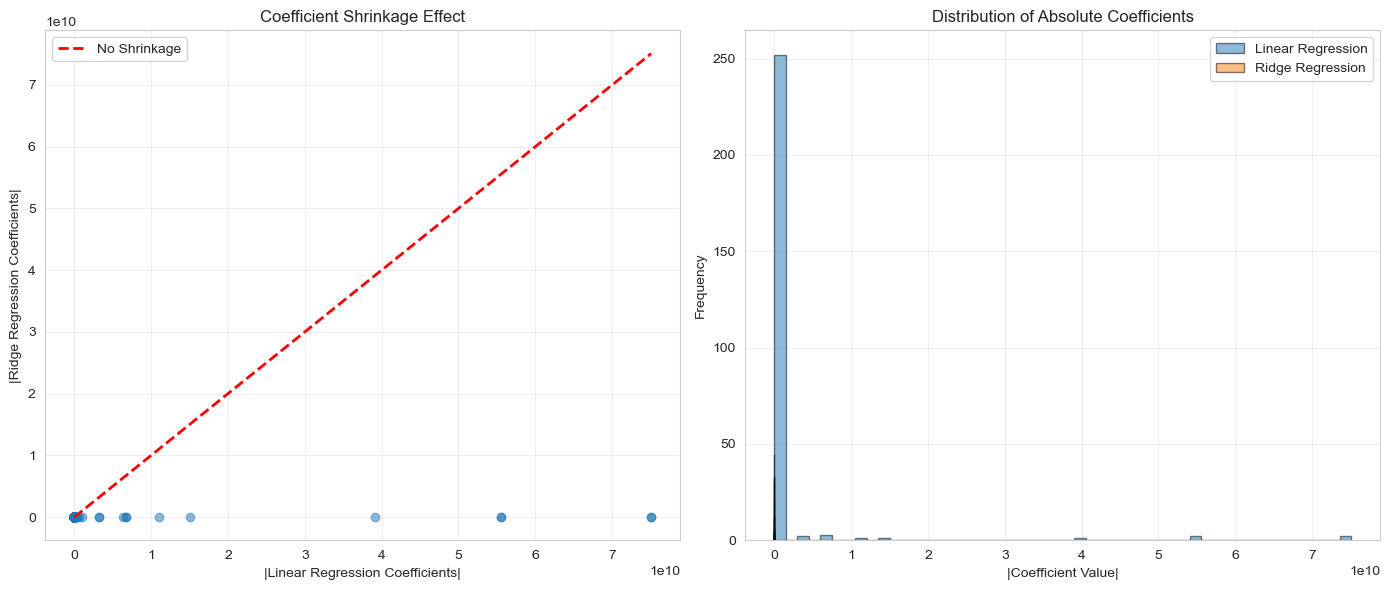

✓ Coefficient comparison plot saved


In [42]:
# ============================================================================
# 8. COMPARISON WITH LINEAR REGRESSION
# ============================================================================

print("\n8. COMPARISON: RIDGE VS LINEAR REGRESSION")
print("-" * 80)

# Train a standard linear regression for comparison
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
lr_val_pred = lr_model.predict(X_val_scaled)
lr_val_rmse = np.sqrt(mean_squared_error(y_val, lr_val_pred))

print(f"\nValidation RMSE Comparison:")
print(f"  Linear Regression: {lr_val_rmse:.6f}")
print(f"  Ridge Regression:  {val_rmse:.6f}")
print(f"  Improvement:       {((lr_val_rmse - val_rmse) / lr_val_rmse * 100):.2f}%")

# Compare coefficient magnitudes
lr_coef_mean = np.abs(lr_model.coef_).mean()
ridge_coef_mean = np.abs(ridge_model.coef_).mean()

print(f"\nMean Absolute Coefficient:")
print(f"  Linear Regression: {lr_coef_mean:.6f}")
print(f"  Ridge Regression:  {ridge_coef_mean:.6f}")
print(f"  Shrinkage:         {((lr_coef_mean - ridge_coef_mean) / lr_coef_mean * 100):.2f}%")

# Visualize coefficient comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot absolute coefficients
axes[0].scatter(np.abs(lr_model.coef_), np.abs(ridge_model.coef_), alpha=0.5)
axes[0].plot([0, np.abs(lr_model.coef_).max()], 
             [0, np.abs(lr_model.coef_).max()], 'r--', lw=2, label='No Shrinkage')
axes[0].set_xlabel('|Linear Regression Coefficients|')
axes[0].set_ylabel('|Ridge Regression Coefficients|')
axes[0].set_title('Coefficient Shrinkage Effect')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot coefficient distribution
axes[1].hist(np.abs(lr_model.coef_), bins=50, alpha=0.5, label='Linear Regression', edgecolor='black')
axes[1].hist(np.abs(ridge_model.coef_), bins=50, alpha=0.5, label='Ridge Regression', edgecolor='black')
axes[1].set_xlabel('|Coefficient Value|')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Absolute Coefficients')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Coefficient comparison plot saved")


9. FEATURE IMPORTANCE ANALYSIS
--------------------------------------------------------------------------------

Top 20 Most Important Features:
             Feature  Coefficient  Abs_Coefficient
         OverallQual     0.039295         0.039295
             TotalSF     0.034599         0.034599
           GrLivArea     0.033853         0.033853
            1stFlrSF     0.025154         0.025154
         OverallCond     0.024427         0.024427
             LotArea     0.020862         0.020862
          GarageCars     0.019532         0.019532
Neighborhood_NridgHt     0.018731         0.018731
        TotRmsAbvGrd     0.018175         0.018175
           PoolQC_Gd    -0.018116         0.018116
          GarageArea     0.017556         0.017556
Neighborhood_StoneBr     0.016329         0.016329
           TotalBath     0.015890         0.015890
Neighborhood_Crawfor     0.014985         0.014985
        CentralAir_Y     0.014775         0.014775
         BsmtQual_TA    -0.013802     

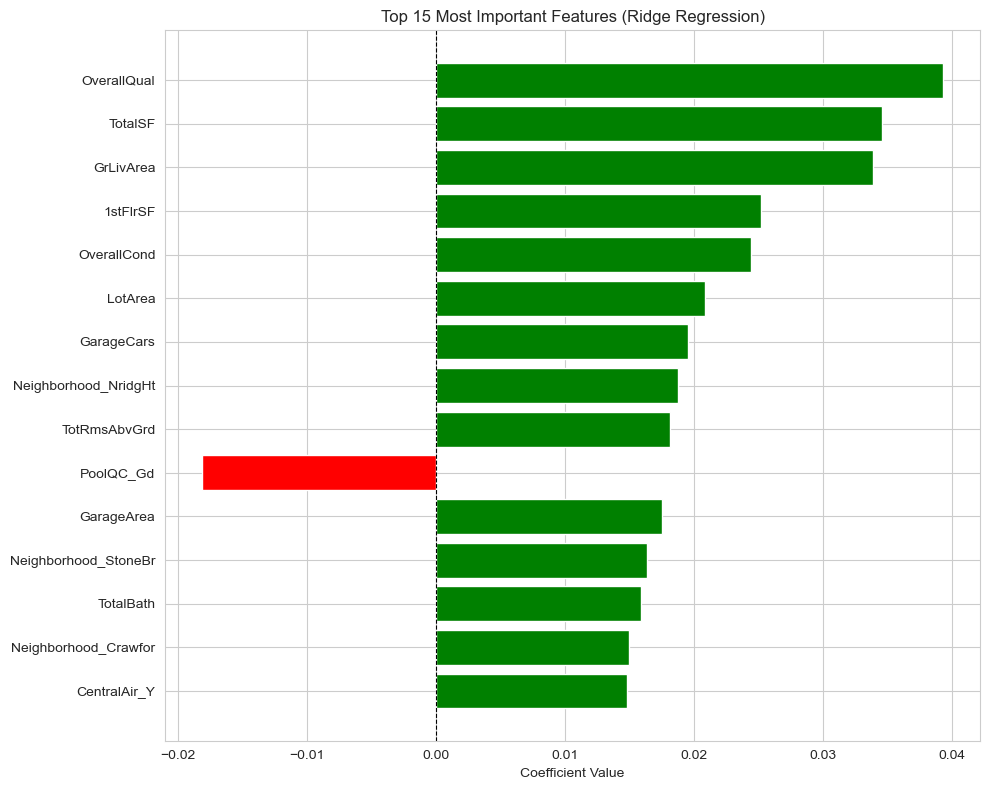


✓ Feature importance plot saved


In [43]:
# ============================================================================
# 9. FEATURE IMPORTANCE ANALYSIS
# ============================================================================

print("\n9. FEATURE IMPORTANCE ANALYSIS")
print("-" * 80)

# Get feature importance based on absolute coefficient values
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': ridge_model.coef_,
    'Abs_Coefficient': np.abs(ridge_model.coef_)
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 20 Most Important Features:")
print(feature_importance.head(20).to_string(index=False))

# Visualize top 15 feature importances
plt.figure(figsize=(10, 8))
top_features = feature_importance.head(15)
colors = ['green' if x > 0 else 'red' for x in top_features['Coefficient']]
plt.barh(range(len(top_features)), top_features['Coefficient'], color=colors)
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Coefficient Value')
plt.title('Top 15 Most Important Features (Ridge Regression)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\n✓ Feature importance plot saved")


10. RESIDUAL ANALYSIS
--------------------------------------------------------------------------------


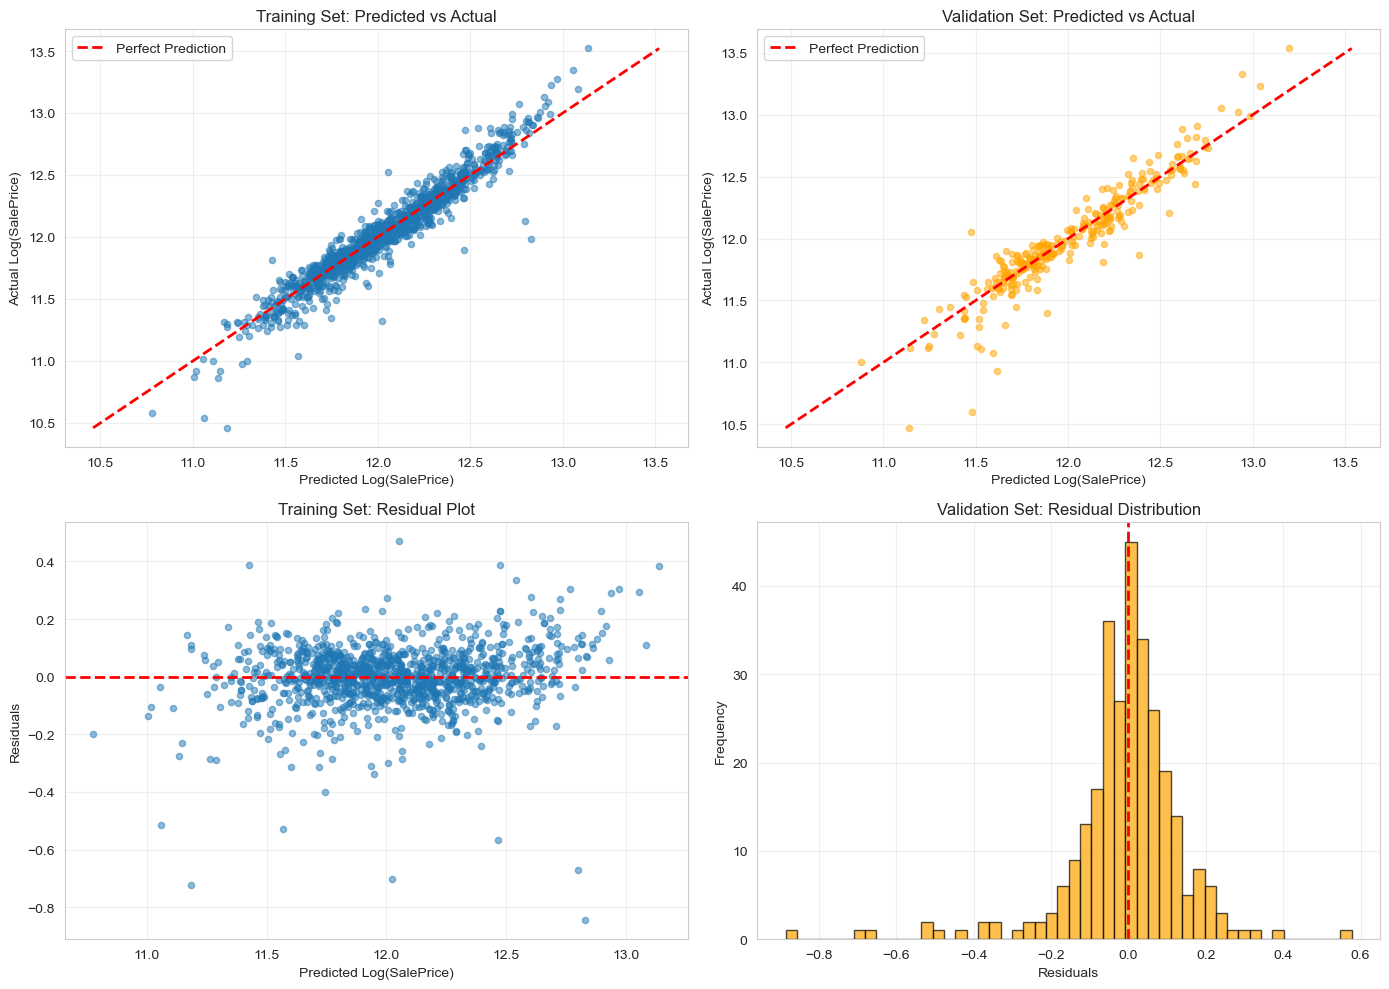

✓ Residual analysis plots saved

Residual Statistics (Validation Set):
  Mean: -0.007603 (should be close to 0)
  Std:  0.148305
  Min:  -0.886323
  Max:  0.577099


In [44]:
# ============================================================================
# 10. RESIDUAL ANALYSIS
# ============================================================================

print("\n10. RESIDUAL ANALYSIS")
print("-" * 80)

# Calculate residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Predicted vs Actual (Training)
axes[0, 0].scatter(y_train_pred, y_train, alpha=0.5, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], 
                [y_train.min(), y_train.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Predicted Log(SalePrice)')
axes[0, 0].set_ylabel('Actual Log(SalePrice)')
axes[0, 0].set_title('Training Set: Predicted vs Actual')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Predicted vs Actual (Validation)
axes[0, 1].scatter(y_val_pred, y_val, alpha=0.5, s=20, color='orange')
axes[0, 1].plot([y_val.min(), y_val.max()], 
                [y_val.min(), y_val.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Predicted Log(SalePrice)')
axes[0, 1].set_ylabel('Actual Log(SalePrice)')
axes[0, 1].set_title('Validation Set: Predicted vs Actual')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Plot (Training)
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.5, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Log(SalePrice)')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residual Distribution (Validation)
axes[1, 1].hist(val_residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Validation Set: Residual Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/visualizations/ridge_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Residual analysis plots saved")

# Statistical tests for residuals
print(f"\nResidual Statistics (Validation Set):")
print(f"  Mean: {val_residuals.mean():.6f} (should be close to 0)")
print(f"  Std:  {val_residuals.std():.6f}")
print(f"  Min:  {val_residuals.min():.6f}")
print(f"  Max:  {val_residuals.max():.6f}")


11. PREDICTION ERROR ANALYSIS
--------------------------------------------------------------------------------

Mean Absolute Percentage Error (MAPE):
  Training:   7.61%
  Validation: 10.07%


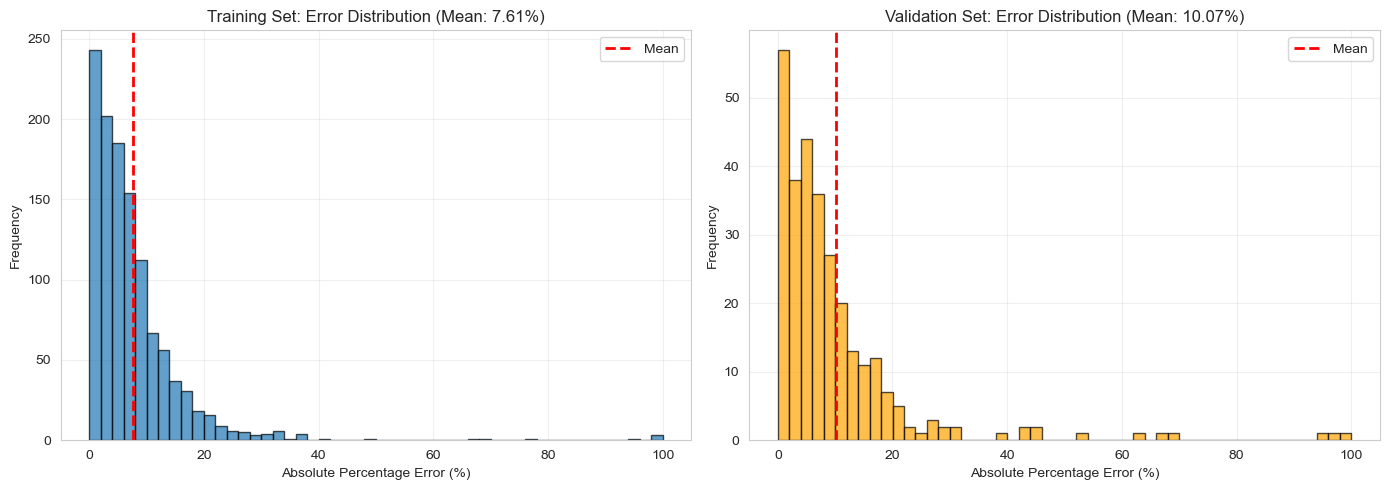

✓ Error distribution plots saved


In [45]:
# ============================================================================
# 11. PREDICTION ERROR DISTRIBUTION (UPDATED WITH FIX)
# ============================================================================

print("\n11. PREDICTION ERROR ANALYSIS")
print("-" * 80)

# Calculate absolute percentage errors (on original scale)
y_train_original = np.expm1(y_train)
y_train_pred_original = np.expm1(y_train_pred)
y_val_original = np.expm1(y_val)
y_val_pred_original = np.expm1(y_val_pred)

# Calculate APE with handling for invalid values
train_ape = np.abs((y_train_original - y_train_pred_original) / y_train_original) * 100
val_ape = np.abs((y_val_original - y_val_pred_original) / y_val_original) * 100

# Remove infinite and NaN values
train_ape_clean = train_ape[np.isfinite(train_ape)]
val_ape_clean = val_ape[np.isfinite(val_ape)]

# Report any removed values
n_train_removed = len(train_ape) - len(train_ape_clean)
n_val_removed = len(val_ape) - len(val_ape_clean)

if n_train_removed > 0:
    print(f"⚠ Removed {n_train_removed} invalid values from training APE")
if n_val_removed > 0:
    print(f"⚠ Removed {n_val_removed} invalid values from validation APE")

print(f"\nMean Absolute Percentage Error (MAPE):")
print(f"  Training:   {train_ape_clean.mean():.2f}%")
print(f"  Validation: {val_ape_clean.mean():.2f}%")

# Optional: cap extreme values for better visualization
train_ape_viz = np.clip(train_ape_clean, 0, 100)  # Cap at 100%
val_ape_viz = np.clip(val_ape_clean, 0, 100)

# Visualize error distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_ape_viz, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Absolute Percentage Error (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Training Set: Error Distribution (Mean: {train_ape_clean.mean():.2f}%)')
axes[0].axvline(train_ape_clean.mean(), color='r', linestyle='--', lw=2, label='Mean')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(val_ape_viz, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Absolute Percentage Error (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Validation Set: Error Distribution (Mean: {val_ape_clean.mean():.2f}%)')
axes[1].axvline(val_ape_clean.mean(), color='r', linestyle='--', lw=2, label='Mean')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/visualizations/ridge_error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Error distribution plots saved")


12. REGULARIZATION PATH VISUALIZATION
--------------------------------------------------------------------------------


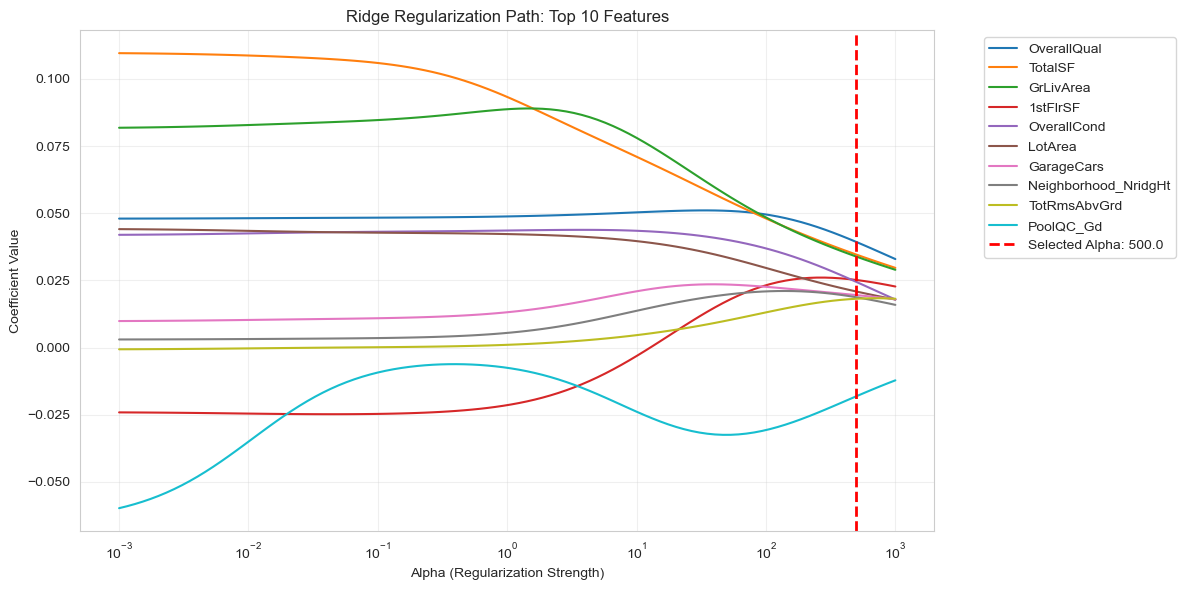

✓ Regularization path plot saved


In [46]:
# ============================================================================
# 12. REGULARIZATION PATH VISUALIZATION
# ============================================================================

print("\n12. REGULARIZATION PATH VISUALIZATION")
print("-" * 80)

# Train models with different alphas to show regularization path
alphas_path = np.logspace(-3, 3, 100)
coefs = []

for alpha in alphas_path:
    ridge_temp = Ridge(alpha=alpha)
    ridge_temp.fit(X_train_scaled, y_train)
    coefs.append(ridge_temp.coef_)

coefs = np.array(coefs)

# Plot regularization path for top features
plt.figure(figsize=(12, 6))
top_feature_indices = feature_importance.head(10).index
for idx in top_feature_indices:
    feature_idx = X.columns.get_loc(feature_importance.loc[idx, 'Feature'])
    plt.plot(alphas_path, coefs[:, feature_idx], 
             label=feature_importance.loc[idx, 'Feature'])

plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regularization Path: Top 10 Features')
plt.axvline(x=best_alpha, color='r', linestyle='--', lw=2, label=f'Selected Alpha: {best_alpha}')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/visualizations/ridge_regularization_path.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Regularization path plot saved")

In [47]:
# ============================================================================
# 13. MAKE PREDICTIONS ON TEST SET
# ============================================================================

print("\n13. GENERATING TEST SET PREDICTIONS")
print("-" * 80)

# Make predictions on test set
y_test_pred = ridge_model.predict(X_test_scaled)

# Transform back to original scale
y_test_pred_original = np.expm1(y_test_pred)

print(f"Test predictions generated: {len(y_test_pred_original)} samples")
print(f"Prediction statistics (original scale):")
print(f"  Mean:   ${y_test_pred_original.mean():,.2f}")
print(f"  Median: ${np.median(y_test_pred_original):,.2f}")
print(f"  Min:    ${y_test_pred_original.min():,.2f}")
print(f"  Max:    ${y_test_pred_original.max():,.2f}")


13. GENERATING TEST SET PREDICTIONS
--------------------------------------------------------------------------------
Test predictions generated: 1459 samples
Prediction statistics (original scale):
  Mean:   $176,676.65
  Median: $158,205.67
  Min:    $59,146.99
  Max:    $598,063.05


In [48]:
# ============================================================================
# 14. SAVE RESULTS
# ============================================================================

print("\n14. SAVING RESULTS")
print("-" * 80)

# Save predictions
predictions_df = pd.DataFrame({
    'Id': range(1461, 1461 + len(y_test_pred_original)),
    'SalePrice': y_test_pred_original
})
predictions_df.to_csv('../results/ridge_predictions.csv', index=False)
print("✓ Predictions saved to 'ridge_predictions.csv'")

# Save model metrics
metrics_df = pd.DataFrame({
    'Model': ['Ridge Regression'],
    'Best_Alpha': [best_alpha],
    'Train_RMSE': [train_rmse],
    'Val_RMSE': [val_rmse],
    'Train_MAE': [train_mae],
    'Val_MAE': [val_mae],
    'Train_R2': [train_r2],
    'Val_R2': [val_r2],
    'CV_RMSE_Mean': [cv_rmse_scores.mean()],
    'CV_RMSE_Std': [cv_rmse_scores.std()],
    'Train_MAPE': [train_ape.mean()],
    'Val_MAPE': [val_ape.mean()]
})
metrics_df.to_csv('../results/ridge_metrics.csv', index=False)
print("✓ Metrics saved to 'ridge_metrics.csv'")

# Save feature importance
feature_importance.to_csv('../results/ridge_feature_importance.csv', index=False)
print("✓ Feature importance saved to 'ridge_feature_importance.csv'")


14. SAVING RESULTS
--------------------------------------------------------------------------------
✓ Predictions saved to 'ridge_predictions.csv'
✓ Metrics saved to 'ridge_metrics.csv'
✓ Feature importance saved to 'ridge_feature_importance.csv'


In [ ]:
# ============================================================================
# 15. FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("RIDGE REGRESSION MODEL - FINAL SUMMARY")
print("="*80)

print("\nMODEL SPECIFICATIONS:")
print(f"  Algorithm: Ridge Regression (L2 Regularization)")
print(f"  Best Alpha: {best_alpha}")
print(f"  Features: {X.shape[1]}")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Validation samples: {X_val.shape[0]}")
print(f"  Feature scaling: StandardScaler")

print("\nPERFORMANCE METRICS:")
print(f"  Validation RMSE: {val_rmse:.6f} (log scale)")
print(f"  Validation MAE:  {val_mae:.6f} (log scale)")
print(f"  Validation R²:   {val_r2:.6f}")
print(f"  Validation MAPE: {val_ape_clean.mean():.2f}% (original scale)")
print(f"  CV RMSE (mean):  {cv_rmse_scores.mean():.6f} ± {cv_rmse_scores.std():.6f}")

print("\nREGULARIZATION EFFECTS:")
print(f"  Coefficient shrinkage: {((lr_coef_mean - ridge_coef_mean) / lr_coef_mean * 100):.2f}%")
print(f"  Performance improvement over Linear Regression: {((lr_val_rmse - val_rmse) / lr_val_rmse * 100):.2f}%")

print("\nTOP 5 MOST IMPORTANT FEATURES:")
for i, row in feature_importance.head(5).iterrows():
    print(f"  {row['Feature']}: {row['Coefficient']:.4f}")

print("\nMODEL CHARACTERISTICS:")
if val_r2 > 0.8:
    print("  ✓ Strong predictive power (R² > 0.8)")
elif val_r2 > 0.6:
    print("  ✓ Good predictive power (R² > 0.6)")
else:
    print("  ⚠ Moderate predictive power (R² < 0.6)")

if abs(val_residuals.mean()) < 0.01:
    print("  ✓ Unbiased predictions (mean residual ≈ 0)")
else:
    print("  ⚠ Slight bias detected in predictions")

if best_alpha > 0:
    print(f"  ✓ Regularization applied (α = {best_alpha})")

print("\nOUTPUT FILES:")
print("  • ../results/ridge_predictions.csv")
print("  • ../results/ridge_metrics.csv")
print("  • ../results/ridge_feature_importance.csv")
print("  • ../results/visualizations/ridge_alpha_selection.png")
print("  • ../results/visualizations/ridge_coefficient_comparison.png")
print("  • ../results/visualizations/ridge_feature_importance.png")
print("  • ../results/visualizations/ridge_residual_analysis.png")
print("  • ../results/visualizations/ridge_error_distribution.png")
print("  • ../results/visualizations/ridge_regularization_path.png")

print("\n" + "="*80)
print("✓ RIDGE REGRESSION MODEL COMPLETE!")
print("="*80)


RIDGE REGRESSION MODEL - FINAL SUMMARY

MODEL SPECIFICATIONS:
  Algorithm: Ridge Regression (L2 Regularization)
  Best Alpha: 500.0
  Features: 264
  Training samples: 1168
  Validation samples: 292
  Feature scaling: StandardScaler

PERFORMANCE METRICS:
  Validation RMSE: 0.148246 (log scale)
  Validation MAE:  0.095142 (log scale)
  Validation R²:   0.882231
  Validation MAPE: 10.07% (original scale)
  CV RMSE (mean):  0.133258 ± 0.018207

REGULARIZATION EFFECTS:
  Coefficient shrinkage: 100.00%
  Performance improvement over Linear Regression: 100.00%

TOP 5 MOST IMPORTANT FEATURES:
  OverallQual: 0.0393
  TotalSF: 0.0346
  GrLivArea: 0.0339
  1stFlrSF: 0.0252
  OverallCond: 0.0244

MODEL CHARACTERISTICS:
  ✓ Strong predictive power (R² > 0.8)
  ✓ Unbiased predictions (mean residual ≈ 0)
  ✓ Regularization applied (α = 500.0)

OUTPUT FILES:
  • ../results/ridge_predictions.csv
  • ../results/ridge_metrics.csv
  • ../results/ridge_feature_importance.csv
  • ../results/visualizations